#### Malls dataset

#### Data ingestion

In [1]:
from warnings  import  filterwarnings
filterwarnings('ignore')


In [2]:
import  pandas as pd
import numpy as  np
import  matplotlib.pyplot as plt
import  seaborn as  sns

In [3]:
df  =  pd.read_csv(r"C:\Users\admin\Downloads\Mall_Customers.csv")

### Basic checks

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df.drop(['CustomerID'] , axis  = 1  , inplace  =  True)

In [10]:
# rename  columns

In [12]:
df.rename(columns  = {'Annual Income (k$)' :'Annual Income' , 
                    'Spending Score (1-100)' : 'Spending Score'} , inplace  =  True)

In [15]:
df.columns

Index(['Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

<Axes: xlabel='Spending Score', ylabel='Annual Income'>

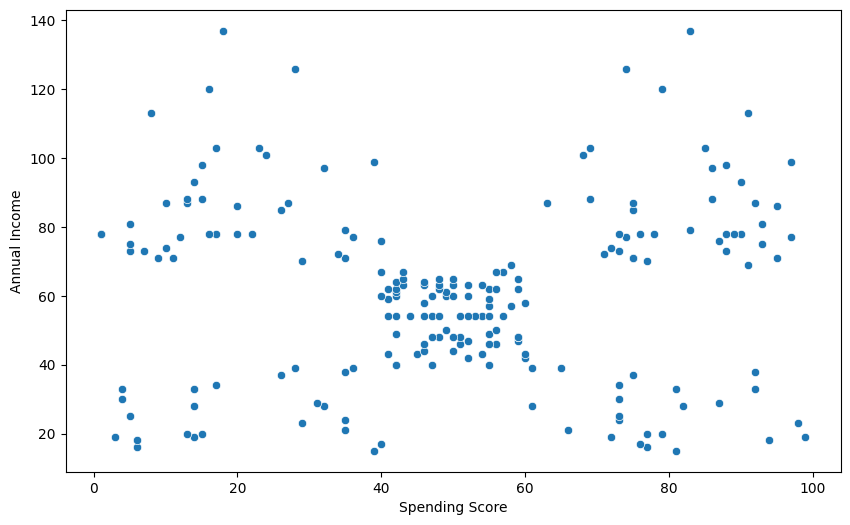

In [17]:
plt.figure(figsize = (10 , 6))
sns.scatterplot(data =  df  ,  x  =   'Spending Score' , 
                y  = 'Annual Income')

In [20]:
x  =  df[['Spending Score' ,'Annual Income']]

In [21]:
x.head()

,Spending Score,Annual Income
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


#### create  pipeline

In [18]:
from  sklearn.pipeline  import Pipeline
from sklearn.preprocessing  import StandardScaler
from sklearn.impute  import SimpleImputer

In [23]:
num_pipeline  =  Pipeline(steps  =  [('imputer' ,  SimpleImputer(strategy  =  'mean') ), 
                                      ('scaler' ,  StandardScaler())])

In [24]:
x_scaled  =  num_pipeline.fit_transform(x)

In [25]:
x_scaled =  pd.DataFrame(x_scaled  ,  columns  =  x.columns)

In [26]:
x_scaled.head()

,Spending Score,Annual Income
0,-0.434801,-1.738999
1,1.195704,-1.738999
2,-1.715913,-1.700830
3,1.040418,-1.700830
4,-0.395980,-1.662660


#### kmeans clustering

In [27]:
from sklearn.cluster import KMeans

In [28]:
km  =  KMeans( n_clusters= 5)

In [29]:
km.fit(x_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [30]:
km.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [31]:
km.inertia_

65.56840815571681

In [34]:
inertia  = []
for  k  in range(2 , 15):
    kmean  =  KMeans(k)
    kmean.fit(x)
    inertia.append(kmean.inertia_)
print(inertia)

[183811.2827701642, 150538.9293823326, 82867.05633255636, 44448.4554479337, 38788.45862332113, 31676.36973205366, 29021.45393591916, 24552.29329897225, 22190.65537406735, 18737.19685070805, 15952.88563570381, 15782.367640473118, 15540.527131981322]


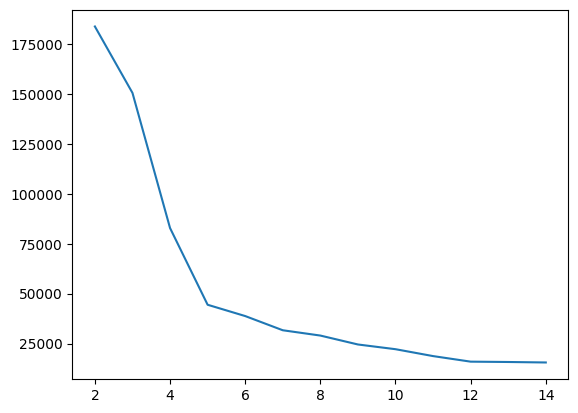

In [35]:
plt.plot(range(2 , 15) ,  inertia)

### use another method   to decide k

In [ ]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [43]:
from  yellowbrick.cluster.elbow import kelbow_visualizer

ModuleNotFoundError: No module named 'distutils'

In [42]:
from yellowbrick.cluster import KElbowVisualizer

ModuleNotFoundError: No module named 'distutils'